## Code : 9OrR52ctJ

In [2]:
import networkx as nx
import matplotlib.pyplot as plt
import os
import scipy as sp
import numpy as np

## QUESTION 1

### a) Local Clustering Coefficient

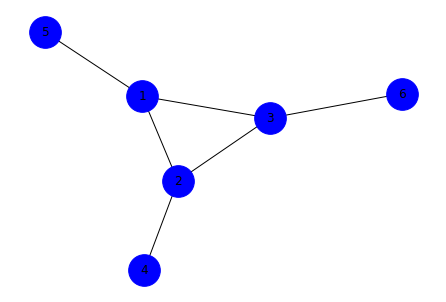

In [3]:
G = nx.Graph()
G.add_edges_from([(1,2),(1,3),(1,5),(2,3),(2,4),(3,6)])
nx.draw(G, with_labels = True, node_color = 'b', node_size = 1000)

The Local Clustering Coefficient is given by : $Cc(i) = \dfrac{e_{i}}{\dfrac{k_{i}(k_{i} - 1)} {2}}$
$ Cc(1) = \dfrac{1}{3(3-1) / 2} = \dfrac{1}{3} = 0.33.. \\
Cc(2) = \dfrac{1}{3(3-1) / 2} = \dfrac{1}{3} = 0.33.. \\
Cc(3) = \dfrac{1}{3(3-1) / 2} = \dfrac{1}{3} = 0.33.. \\
Cc(4) = \dfrac{0}{1(1-1) / 2} = 0 \\
Cc(5) = \dfrac{0}{1(1-1) / 2} = 0 \\ 
Cc(6) = \dfrac{0}{1(1-1) / 2} = 0 $

In [4]:
L = []
for i in G.nodes():
    d = nx.clustering(G,i)
    L.append(d)
print ('The nodes are :', G.nodes()) 
print('The Cc are', L)

The nodes are : [1, 2, 3, 5, 4, 6]
The Cc are [0.3333333333333333, 0.3333333333333333, 0.3333333333333333, 0, 0, 0]


### b) Consider an undirected network of size N in which each node has degree k = 1. Which condition does N have to satisfy? What is the degree distribution of this network? How many components does the network have ? 

DegreeView({'Domini': 1, 'Berthine': 1, 'Michael': 1, 'Yollande': 1, 'Edwine': 1, 'Mohamed': 1})

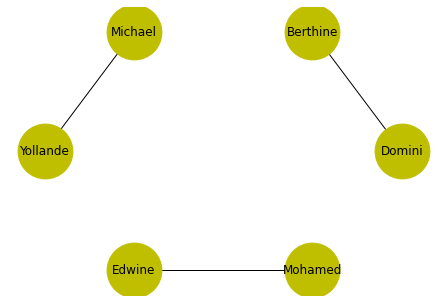

In [5]:
H = nx.Graph()
H.add_edges_from([('Domini','Berthine'),('Michael','Yollande'),('Edwine','Mohamed')])
nx.draw_circular(H, with_labels=True, node_size=3000, node_color='y') #Draw the graph
H.degree() #Print the degree of each node

According to the Handshaking lemma which is given by : $\sum_{i = 1}^{N}ki = 2L$

#### Degree distribution of H

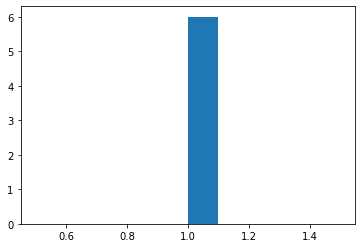

In [6]:
deg_values = list(dict(H.degree()).values())
plt.figure(figsize=(6,4))
plt.hist(deg_values, label=str)
plt.xlabel=('k')
plt.ylabel=('pk')
plt.show()

### c) Consider now a network in which each node has degree k = 2 and clustering coeffcient C = 1. How does the network look like? What condition does N satisfy in this case ?

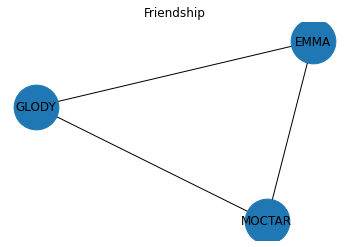

In [9]:
I = nx.Graph()
I.add_edges_from([('GLODY', 'MOCTAR'), ('GLODY','EMMA'),('EMMA','MOCTAR')])
plt.title('Friendship')
nx.draw(I, with_labels=True, node_size = 2000)

In [10]:
print('Cc for each node :', nx.clustering(I))

Cc for each node : {'GLODY': 1.0, 'MOCTAR': 1.0, 'EMMA': 1.0}


## QUESTION 2

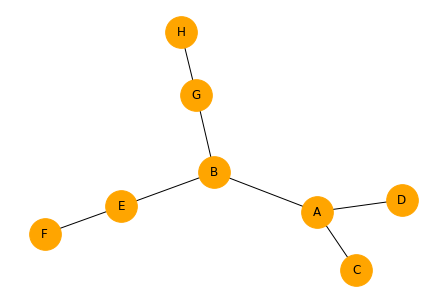

In [11]:
J = nx.Graph()
J.add_nodes_from(['A','B','C','D','E','F','G','H'])
J.add_edges_from([('A','B'),('B','E'),('B','G'),('C','A'),('D','A'),('E','F'),('G','H')])
nx.draw(J, with_labels=True, node_size=1000, pos=nx.spring_layout(J),node_color='orange')

In [12]:
A = nx.adjacency_matrix(J).todense()
A

<ipython-input-12-393b2c996791>:1: FutureWarning: adjacency_matrix will return a scipy.sparse array instead of a matrix in Networkx 3.0.
  A = nx.adjacency_matrix(J).todense()


matrix([[0, 1, 1, 1, 0, 0, 0, 0],
        [1, 0, 0, 0, 1, 0, 1, 0],
        [1, 0, 0, 0, 0, 0, 0, 0],
        [1, 0, 0, 0, 0, 0, 0, 0],
        [0, 1, 0, 0, 0, 1, 0, 0],
        [0, 0, 0, 0, 1, 0, 0, 0],
        [0, 1, 0, 0, 0, 0, 0, 1],
        [0, 0, 0, 0, 0, 0, 1, 0]], dtype=int32)

### a) Degree centrality 

#### Personal code

In [13]:
import numpy as np
t = np.ones(len(A), dtype=int) #Genere a vector of length 8 of int 1
print('Degree centrality :', t@A) #Degree centrality of each node
print('Degree centrality normalized :',(t@A)/(len(A)-1)) #CD normalized 

Degree centrality : [[3 3 1 1 2 1 2 1]]
Degree centrality normalized : [[0.42857143 0.42857143 0.14285714 0.14285714 0.28571429 0.14285714
  0.28571429 0.14285714]]


In [14]:
nx.degree_centrality(J)

{'A': 0.42857142857142855,
 'B': 0.42857142857142855,
 'C': 0.14285714285714285,
 'D': 0.14285714285714285,
 'E': 0.2857142857142857,
 'F': 0.14285714285714285,
 'G': 0.2857142857142857,
 'H': 0.14285714285714285}

### b) Closeness centrality 

#### Personal code

In [15]:
D = list(nx.all_pairs_shortest_path_length(J))

In [16]:
def CC(Graph,node):
    D = list(nx.all_pairs_shortest_path_length(J))
    d = {'A':1, 'B':2, 'C':3, 'D':4, 'E':5, 'F':6, 'G':7, 'H':8}
    j = d[node]
    lst = [D[j][1][node] for j in range(len(J.nodes()))]
    return (len(J.nodes()) - 1) / sum(lst)

In [17]:
CC(J,'A'), CC(J,'B')

(0.5384615384615384, 0.6363636363636364)

#### Built-in function

In [18]:
nx.closeness_centrality(J)

{'A': 0.5384615384615384,
 'B': 0.6363636363636364,
 'C': 0.3684210526315789,
 'D': 0.3684210526315789,
 'E': 0.4666666666666667,
 'F': 0.3333333333333333,
 'G': 0.4666666666666667,
 'H': 0.3333333333333333}

### c) Eigenvector centrality 

### Personal code 

In [19]:
from numpy.linalg import linalg as la

def EV(n):
    nodes=list(J.nodes)
    eig_vec=la.eig(A)[1]
    eig_vec_centrality=np.absolute(eig_vec[:,0])
    return eig_vec_centrality[nodes.index(n)]

In [20]:
EV("A"), EV("B") 

(matrix([[0.5]]), matrix([[0.57453835]]))

#### Built-in function

In [21]:
nx.eigenvector_centrality(J)

{'A': 0.49999622394725,
 'B': 0.5745395873613748,
 'C': 0.23797857616309853,
 'D': 0.23797857616309853,
 'E': 0.3535560606456024,
 'F': 0.1682805055991448,
 'G': 0.3535560606456024,
 'H': 0.1682805055991448}

### d) Betweenness centrality 

#### Personal code

In [22]:
def BC(n):
    Count=0
    nodes=list(J.nodes)
    nodes.remove(n)
    for j in range(len(nodes)-1):
        for k in range(j+1,len(nodes)):
                if (j!=k):
                    path=[p for p in nx.all_shortest_paths(J,source=nodes[j],target=nodes[k])]
                    for p in path:
                        if n in p:
                            Count+=1
                    bc=Count/len(path)
    bcc=2*bc/((len(nodes))*(len(nodes)-1))
    return(bcc)

In [23]:
BC("A"), BC("B")

(0.5238095238095238, 0.7619047619047619)

#### Built-in function

In [24]:
nx.betweenness_centrality(J)

{'A': 0.5238095238095237,
 'B': 0.7619047619047619,
 'C': 0.0,
 'D': 0.0,
 'E': 0.2857142857142857,
 'F': 0.0,
 'G': 0.2857142857142857,
 'H': 0.0}

## QUESTION 3

### a) Karate club graph

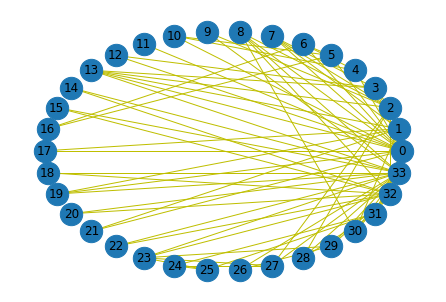

In [25]:
K = nx.karate_club_graph()
nx.draw_circular(K, with_labels=True, edge_color = 'y', node_size = 500)

In [40]:
#Degrees of nodes 
d = nx.degree(K)
d

DegreeView({0: 16, 1: 9, 2: 10, 3: 6, 4: 3, 5: 4, 6: 4, 7: 4, 8: 5, 9: 2, 10: 3, 11: 1, 12: 2, 13: 5, 14: 2, 15: 2, 16: 2, 17: 2, 18: 2, 19: 3, 20: 2, 21: 2, 22: 2, 23: 5, 24: 3, 25: 3, 26: 2, 27: 4, 28: 3, 29: 4, 30: 4, 31: 6, 32: 12, 33: 17})

In [39]:
K.nodes(), K.edges() #Number of nodes and number of edges

(NodeView((0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33)),
 EdgeView([(0, 1), (0, 2), (0, 3), (0, 4), (0, 5), (0, 6), (0, 7), (0, 8), (0, 10), (0, 11), (0, 12), (0, 13), (0, 17), (0, 19), (0, 21), (0, 31), (1, 2), (1, 3), (1, 7), (1, 13), (1, 17), (1, 19), (1, 21), (1, 30), (2, 3), (2, 7), (2, 8), (2, 9), (2, 13), (2, 27), (2, 28), (2, 32), (3, 7), (3, 12), (3, 13), (4, 6), (4, 10), (5, 6), (5, 10), (5, 16), (6, 16), (8, 30), (8, 32), (8, 33), (9, 33), (13, 33), (14, 32), (14, 33), (15, 32), (15, 33), (18, 32), (18, 33), (19, 33), (20, 32), (20, 33), (22, 32), (22, 33), (23, 25), (23, 27), (23, 29), (23, 32), (23, 33), (24, 25), (24, 27), (24, 31), (25, 31), (26, 29), (26, 33), (27, 33), (28, 31), (28, 33), (29, 32), (29, 33), (30, 32), (30, 33), (31, 32), (31, 33), (32, 33)]))

In [28]:
#Diameter and Radius
nx.diameter(K), nx.radius(K)

(5, 3)

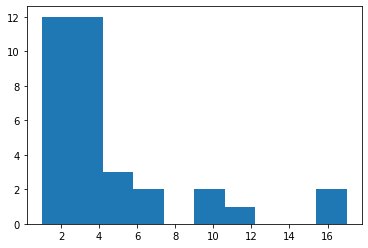

In [29]:
#Degree distribution
degrees = [K.degree(n) for n in K.nodes()]
plt.hist(degrees)
plt.show()

### b) Density of the Karate club graph K 

#### Personal code


$Density(K) = \dfrac{L_{K}}{L_{max}}$

In [30]:
Lmax = (K.number_of_nodes()*(K.number_of_nodes() - 1)) / 2
density = K.number_of_edges() / Lmax
density 

0.13903743315508021

#### Built-in function

In [31]:
nx.density(K)

0.13903743315508021

### c) Plots of Centralities vs nodes

In [34]:
dc = nx.degree_centrality(K)
cc = nx.closeness_centrality(K)
bc = nx.betweenness_centrality(K)
ec = nx.eigenvector_centrality(K)
sc = nx.subgraph_centrality(K)

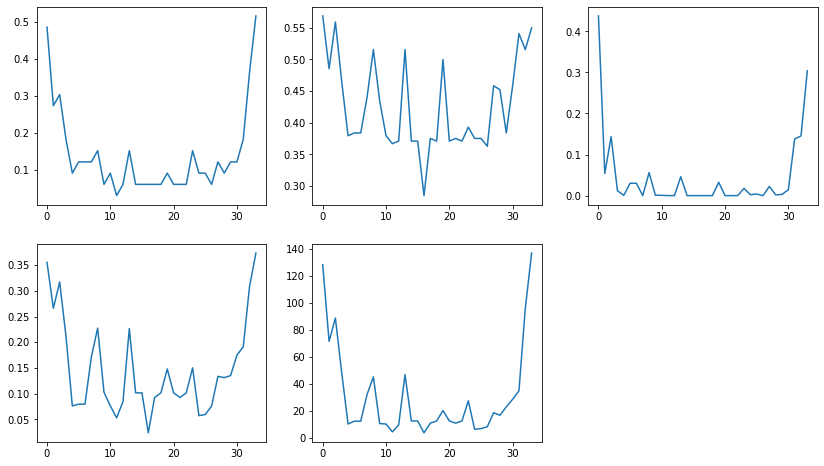

In [38]:
fig = plt.figure(figsize = (14,8))
plt.subplot(2,3,1)
plt.plot(list(K.nodes), (dict(dc)).values()) #1. Node vs Degree centrality
plt.subplot(2,3,2)
plt.plot(list(K.nodes), (dict(cc)).values()) #2. Node vs Closeness centrality 
plt.subplot(2,3,3)
plt.plot(list(K.nodes), (dict(bc)).values()) #3. Node vs Betweenness centrality
plt.subplot(2,3,4)
plt.plot(list(K.nodes), (dict(ec)).values()) #4. Node vs Eigenvector centrality
plt.subplot(2,3,5)
plt.plot(list(K.nodes), (dict(sc)).values()) #5. Node vs Subgraph centrality

### d) Average clustering coefficient

#### Personal code

In [256]:
LLL=[]
for i in range(K.number_of_nodes()) :
        num = 2 * nx.triangles(K,i)
        den = K.degree(i) * (K.degree(i) - 1)
        if den == 0 :
            continue
        Ci = num/den
        LLL.append(Ci)
sum(LLL)/K.number_of_nodes()

0.5706384782076823

#### Built-in function

In [257]:
nx.average_clustering(K)

0.5706384782076823

### f) Average shortest path length 

In [261]:
nx.average_shortest_path_length(K)

2.408199643493761

### g) Scatter plot Ci vs ki

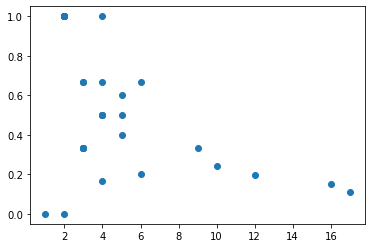

In [294]:
plt.scatter(dict(d).values(), dict(nx.clustering(K)).values())